In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import cm
import matplotlib.pyplot as plt
import klib
%matplotlib inline

src = 'dataScienceTask/T_demo.csv'
dest = 'saved_plots/demo/'

In [12]:
# read csv
df = pd.read_csv(src)
df.head()

,id,race,gender,age
0,0,Unknown,Male,70
1,1,White,Female,71
2,2,White,Female,57
3,3,White,Male,74
4,4,White,Female,50


Text(0.5, 1.0, 'Gender count')

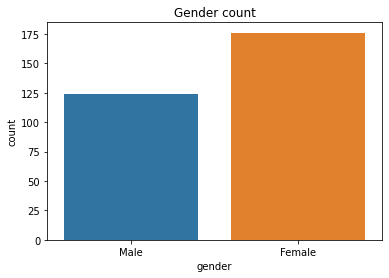

In [13]:
# distribution over gender
ax = sns.countplot(x="gender", data=df)
ax.set_title("Gender count")

- not equal distribution but also not too bad
- to check on this perhaps in future versions of prototype

Text(0.5, 1.0, 'Race count')

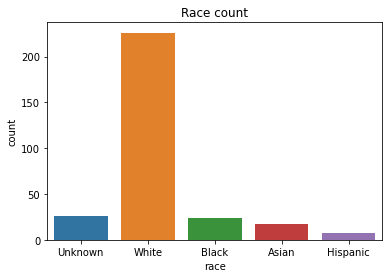

In [14]:
# distribution over race
ax = sns.countplot(x="race", data=df)
ax.set_title("Race count")

- imbalance, more focus on White -> White represents data
- to look at this later after merging

Text(0.5, 1.0, 'Race count')

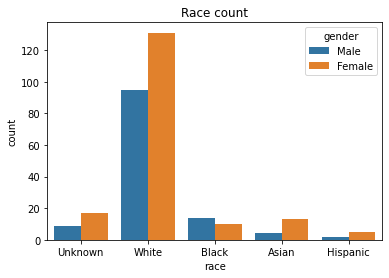

In [15]:
# distribution over race
ax = sns.countplot(x="race", hue="gender", data=df)
ax.set_title("Race count")

- similar distrubution across (difference possibly not so significant)

Text(0.5, 1.0, 'Age distribution')

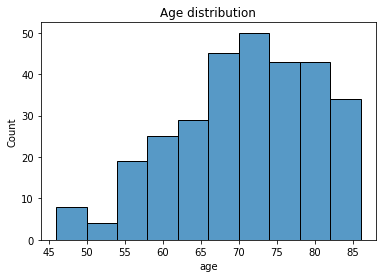

In [16]:
# distribution across age
ax=sns.histplot(data=df, x="age")
ax.set_title("Age distribution")

- marjoity at older age groups
- left skewed distribution

Text(0.5, 1.0, 'Transformed Age distribution')

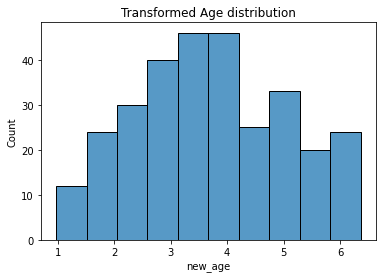

In [17]:
# cubic of age to transform to normal distribution
df['new_age'] = df['age'].apply(lambda x: x**3/100000)
ax=sns.histplot(data=df, x="new_age")
ax.set_title("Transformed Age distribution")

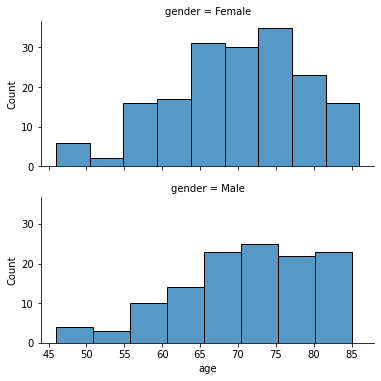

In [18]:
ordered_gender = df.gender.value_counts().index
g = sns.FacetGrid(df, row="gender", row_order=ordered_gender,
                  height=2.7, aspect=2,)
g.map(sns.histplot, "age")


- distrubutions of gender across age are similar

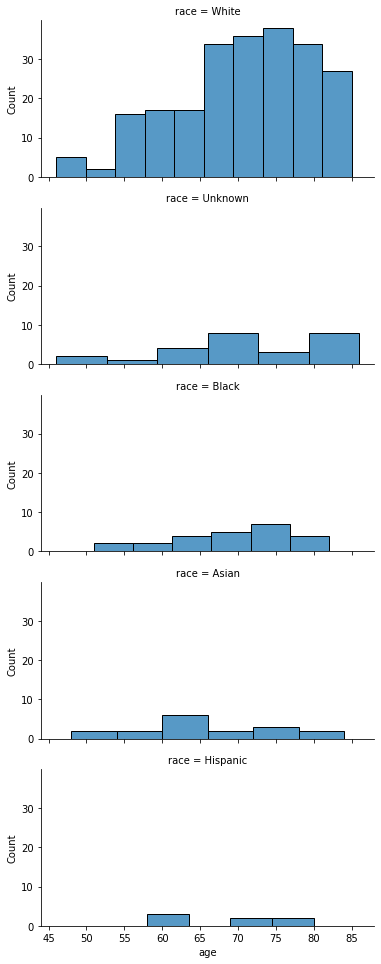

In [19]:
ordered_race = df.race.value_counts().index
g = sns.FacetGrid(df, row="race", row_order=ordered_race,
                  height=2.7, aspect=2,)
g.map(sns.histplot, "age")

- distribution of hispanic is sparse as comapared to others

In [20]:
# modify and merge race
df['new_race'] = df['race']
df['new_race'].replace(to_replace ="Unknown", value ="White", inplace=True) # tentatively take mode -> need to check the longitudinal data 
df['new_race'].replace(to_replace =["Hispanic", "Asian", "Black"], value ="Non white", inplace=True)
df.head(2)

,id,race,gender,age,new_age,new_race
0,0,Unknown,Male,70,3.43000,White
1,1,White,Female,71,3.57911,White


Text(0.5, 1.0, 'Race count')

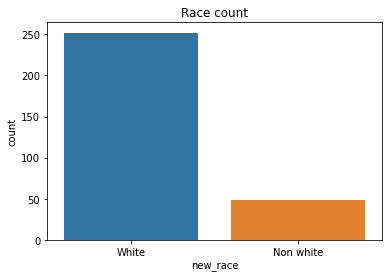

In [21]:
# distribution over race
ax = sns.countplot(x="new_race", data=df)
ax.set_title("Race count")

- still not similar after merging

In [22]:
# read csv
df_target = pd.read_csv('dataScienceTask/T_stage.csv')
df_target.head()

,id,Stage_Progress
0,0,True
1,1,False
2,2,True
3,3,False
4,4,True


Text(0.5, 1.0, 'Target count')

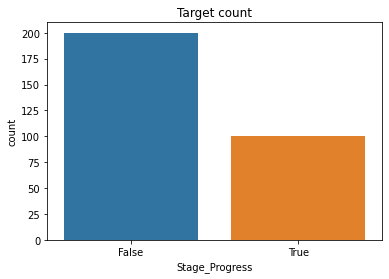

In [23]:
# distribution of targets
ax = sns.countplot(x="Stage_Progress", data=df_target)
ax.set_title("Target count")

- imabalane dataset as target distribution is unequal so the model will see more False than True stages

In [24]:
df['stage'] = df_target['Stage_Progress']
df.head()

,id,race,gender,age,new_age,new_race,stage
0,0,Unknown,Male,70,3.43000,White,True
1,1,White,Female,71,3.57911,White,False
2,2,White,Female,57,1.85193,White,True
3,3,White,Male,74,4.05224,White,False
4,4,White,Female,50,1.25000,White,True


Text(0.5, 1.0, 'Gender count')

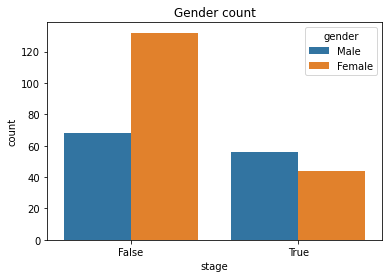

In [25]:
# distribution of gender for each target
ax = sns.countplot(x="stage", hue='gender', data=df)
ax.set_title("Gender count")

- unequal distribution -> removing 50 from Female False will help the distributions to be similar 
- removing from False stage also means overall target distribution wil be more balanced
- drawback: loss of data

Text(0.5, 1.0, 'Race count')

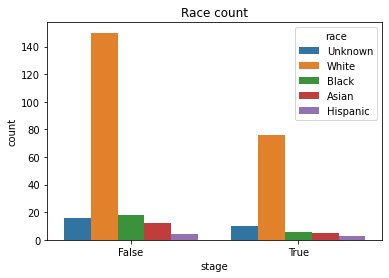

In [26]:
# distribution of race for each target
ax = sns.countplot(x="stage", hue='race', data=df)
ax.set_title("Race count")

Text(0.5, 1.0, 'Race count')

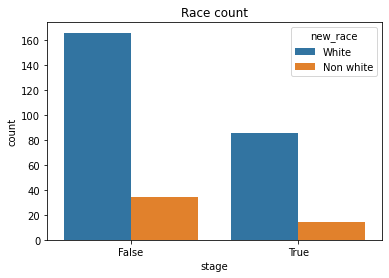

In [27]:
# distribution of race for each target
ax = sns.countplot(x="stage", hue='new_race', data=df)
ax.set_title("Race count")

- similar distribution -> race no effect stage outcome?

Text(0.5, 1.0, 'Target distribution across age')

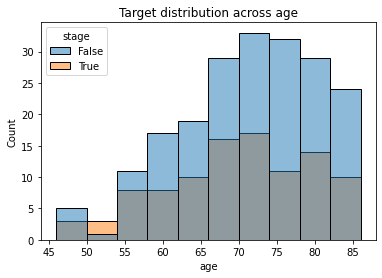

In [28]:
ax=sns.histplot(data=df, x="age", hue='stage')
ax.set_title("Target distribution across age")

- similar distribution -> age no effect stage outcome?

In [29]:
# save new df
df.to_csv('dataScienceTask/new_df.csv')

In [132]:
#klib.cat_plot(df1, top=2, bottom=2)

In [ ]:
# distribution of images across growth stages
#cmap = cm.get_cmap('jet')
#df.groupby('gender',as_index=True).count()['id'].sort_values(ascending=False).plot(kind="bar", rot=45, cmap='jet', fontsize=10)
#plt.title("Gender count")
#plt.ylabel("count")
#plt.show()